In [211]:
#for data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import re

#for data visualizations
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
%matplotlib inline
import pylab

#for machine learning
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import metrics
print ('Libraries Loaded')

Libraries Loaded


In [212]:
prescriber = pd.read_csv('prescriber_clean.csv')

In [213]:
prescriber.head()

,Opioid.Prescriber,Degree,DR_Gender,State,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VENTOLIN.HFA,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE
0,1,DDS,0,TX,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,MD,1,AL,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
2,0,MD,1,NY,General Practice,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25
3,1,MD,0,AZ,Internal Medicine,0,43,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,MD,0,NV,Hematology/Oncology,0,0,0,0,0,...,0,0,0,0,0,17,28,0,0,0


In [214]:
prescriber.shape

(24876, 255)

**Let's remove all drug columns and only keep the non-drug features**

In [215]:
prescriber.drop(['Degree', 'DR_Gender', 'State', 'Specialty'], axis=1, inplace=True)

In [216]:
prescriber.head()

,Opioid.Prescriber,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,...,VENTOLIN.HFA,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,134,0,...,0,0,0,0,0,0,0,0,0,35
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25
3,1,0,43,0,0,0,21,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,17,28,0,0,0


In [217]:
prescriber.shape

(24876, 251)

**Feature Selection**

In [218]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = prescriber.iloc[:,0:251]  #independent columns
y = prescriber.iloc[:,0]    #target column i.e Opioid.Prescriber

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(101,'Score'))  #print 100 best features

                              Specs          Score
101       HYDROCODONE.ACETAMINOPHEN  668351.135733
129            LEVOTHYROXINE.SODIUM  594050.439210
213                     SIMVASTATIN  477183.857830
11              AMLODIPINE.BESYLATE  437185.922642
131                      LISINOPRIL  433017.068105
175                      OMEPRAZOLE  428879.717952
143                   METFORMIN.HCL  379955.741254
90                       GABAPENTIN  317458.132952
89                       FUROSEMIDE  309021.855435
17             ATORVASTATIN.CALCIUM  307007.303094
231                    TRAMADOL.HCL  283554.200765
100             HYDROCHLOROTHIAZIDE  241513.338035
136              LOSARTAN.POTASSIUM  205920.934843
222                  TAMSULOSIN.HCL  203614.406232
152             METOPROLOL.TARTRATE  192481.949779
194              PRAVASTATIN.SODIUM  188144.036913
191              POTASSIUM.CHLORIDE  184765.894541
16                         ATENOLOL  172402.108311
182         OXYCODONE.ACETAMINO

In [219]:
features = featureScores.nlargest(100,'Score')

In [220]:
features.head()

,Specs,Score
101,HYDROCODONE.ACETAMINOPHEN,668351.135733
129,LEVOTHYROXINE.SODIUM,594050.439210
213,SIMVASTATIN,477183.857830
11,AMLODIPINE.BESYLATE,437185.922642
131,LISINOPRIL,433017.068105


In [221]:
features.set_index('Specs', inplace=True)

In [222]:
features.head()

,Score
Specs,
HYDROCODONE.ACETAMINOPHEN,668351.135733
LEVOTHYROXINE.SODIUM,594050.439210
SIMVASTATIN,477183.857830
AMLODIPINE.BESYLATE,437185.922642
LISINOPRIL,433017.068105


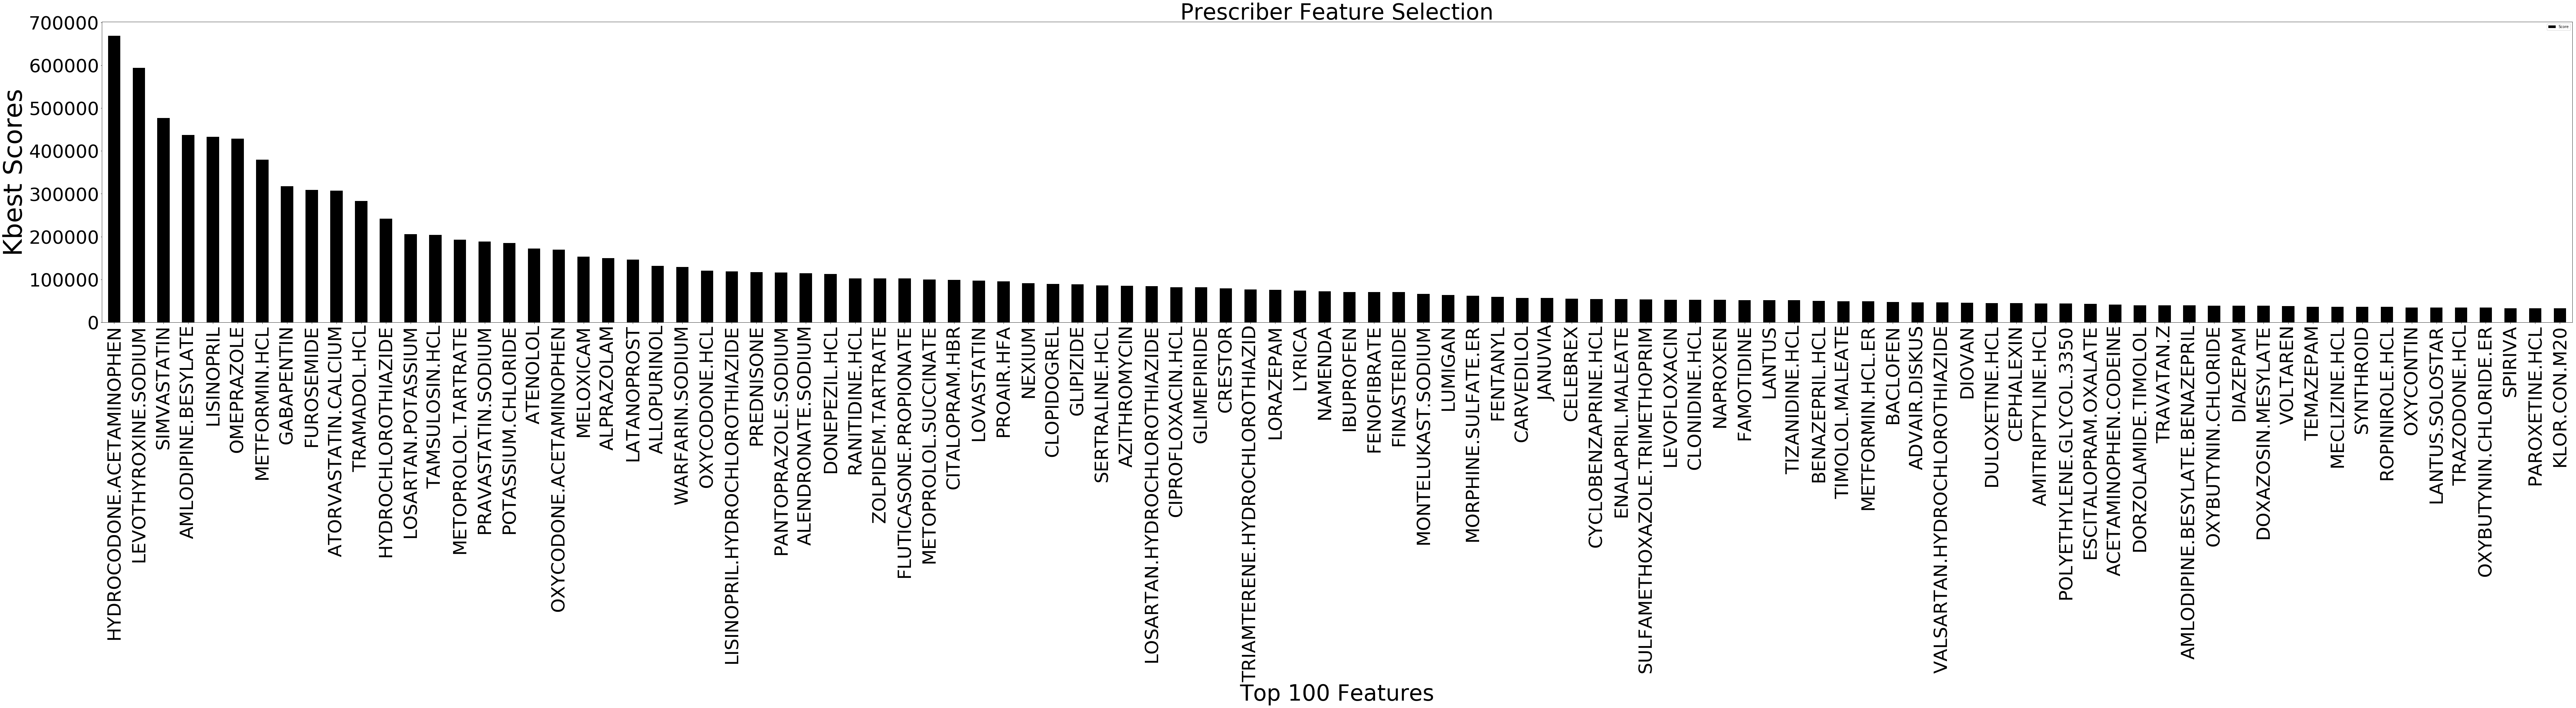

In [223]:
features.plot(kind='bar', figsize = (120, 15), color='black')
plt.xlabel('Top 100 Features', fontsize=60)
plt.xticks(rotation=90, fontsize=50)
plt.ylabel('Kbest Scores', fontsize=70)
plt.yticks(fontsize=50)
plt.title('Prescriber Feature Selection', fontsize=60)

plt.show()

In [224]:
features.index.values.tolist()

['HYDROCODONE.ACETAMINOPHEN',
 'LEVOTHYROXINE.SODIUM',
 'SIMVASTATIN',
 'AMLODIPINE.BESYLATE',
 'LISINOPRIL',
 'OMEPRAZOLE',
 'METFORMIN.HCL',
 'GABAPENTIN',
 'FUROSEMIDE',
 'ATORVASTATIN.CALCIUM',
 'TRAMADOL.HCL',
 'HYDROCHLOROTHIAZIDE',
 'LOSARTAN.POTASSIUM',
 'TAMSULOSIN.HCL',
 'METOPROLOL.TARTRATE',
 'PRAVASTATIN.SODIUM',
 'POTASSIUM.CHLORIDE',
 'ATENOLOL',
 'OXYCODONE.ACETAMINOPHEN',
 'MELOXICAM',
 'ALPRAZOLAM',
 'LATANOPROST',
 'ALLOPURINOL',
 'WARFARIN.SODIUM',
 'OXYCODONE.HCL',
 'LISINOPRIL.HYDROCHLOROTHIAZIDE',
 'PREDNISONE',
 'PANTOPRAZOLE.SODIUM',
 'ALENDRONATE.SODIUM',
 'DONEPEZIL.HCL',
 'RANITIDINE.HCL',
 'ZOLPIDEM.TARTRATE',
 'FLUTICASONE.PROPIONATE',
 'METOPROLOL.SUCCINATE',
 'CITALOPRAM.HBR',
 'LOVASTATIN',
 'PROAIR.HFA',
 'NEXIUM',
 'CLOPIDOGREL',
 'GLIPIZIDE',
 'SERTRALINE.HCL',
 'AZITHROMYCIN',
 'LOSARTAN.HYDROCHLOROTHIAZIDE',
 'CIPROFLOXACIN.HCL',
 'GLIMEPIRIDE',
 'CRESTOR',
 'TRIAMTERENE.HYDROCHLOROTHIAZID',
 'LORAZEPAM',
 'LYRICA',
 'NAMENDA',
 'IBUPROFEN',
 'FENO

**We will now eliminate all columns in the prescriber dataframe EXCEPT those 100 best features determined with the Kbest chi2 method**


In [225]:
prescriber = prescriber[['Opioid.Prescriber', 'HYDROCODONE.ACETAMINOPHEN',
 'LEVOTHYROXINE.SODIUM',
 'SIMVASTATIN',
 'AMLODIPINE.BESYLATE',
 'LISINOPRIL',
 'OMEPRAZOLE',
 'METFORMIN.HCL',
 'GABAPENTIN',
 'FUROSEMIDE',
 'ATORVASTATIN.CALCIUM',
 'TRAMADOL.HCL',
 'HYDROCHLOROTHIAZIDE',
 'LOSARTAN.POTASSIUM',
 'TAMSULOSIN.HCL',
 'METOPROLOL.TARTRATE',
 'PRAVASTATIN.SODIUM',
 'POTASSIUM.CHLORIDE',
 'ATENOLOL',
 'OXYCODONE.ACETAMINOPHEN',
 'MELOXICAM',
 'ALPRAZOLAM',
 'LATANOPROST',
 'ALLOPURINOL',
 'WARFARIN.SODIUM',
 'OXYCODONE.HCL',
 'LISINOPRIL.HYDROCHLOROTHIAZIDE',
 'PREDNISONE',
 'PANTOPRAZOLE.SODIUM',
 'ALENDRONATE.SODIUM',
 'DONEPEZIL.HCL',
 'RANITIDINE.HCL',
 'ZOLPIDEM.TARTRATE',
 'FLUTICASONE.PROPIONATE',
 'METOPROLOL.SUCCINATE',
 'CITALOPRAM.HBR',
 'LOVASTATIN',
 'PROAIR.HFA',
 'NEXIUM',
 'CLOPIDOGREL',
 'GLIPIZIDE',
 'SERTRALINE.HCL',
 'AZITHROMYCIN',
 'LOSARTAN.HYDROCHLOROTHIAZIDE',
 'CIPROFLOXACIN.HCL',
 'GLIMEPIRIDE',
 'CRESTOR',
 'TRIAMTERENE.HYDROCHLOROTHIAZID',
 'LORAZEPAM',
 'LYRICA',
 'NAMENDA',
 'IBUPROFEN',
 'FENOFIBRATE',
 'FINASTERIDE',
 'MONTELUKAST.SODIUM',
 'LUMIGAN',
 'MORPHINE.SULFATE.ER',
 'FENTANYL',
 'CARVEDILOL',
 'JANUVIA',
 'CELEBREX',
 'CYCLOBENZAPRINE.HCL',
 'ENALAPRIL.MALEATE',
 'SULFAMETHOXAZOLE.TRIMETHOPRIM',
 'LEVOFLOXACIN',
 'CLONIDINE.HCL',
 'NAPROXEN',
 'FAMOTIDINE',
 'LANTUS',
 'TIZANIDINE.HCL',
 'BENAZEPRIL.HCL',
 'TIMOLOL.MALEATE',
 'METFORMIN.HCL.ER',
 'BACLOFEN',
 'ADVAIR.DISKUS',
 'VALSARTAN.HYDROCHLOROTHIAZIDE',
 'DIOVAN',
 'DULOXETINE.HCL',
 'CEPHALEXIN',
 'AMITRIPTYLINE.HCL',
 'POLYETHYLENE.GLYCOL.3350',
 'ESCITALOPRAM.OXALATE',
 'ACETAMINOPHEN.CODEINE',
 'DORZOLAMIDE.TIMOLOL',
 'TRAVATAN.Z',
 'AMLODIPINE.BESYLATE.BENAZEPRIL',
 'OXYBUTYNIN.CHLORIDE',
 'DIAZEPAM',
 'DOXAZOSIN.MESYLATE',
 'VOLTAREN',
 'TEMAZEPAM',
 'MECLIZINE.HCL',
 'SYNTHROID',
 'ROPINIROLE.HCL',
 'OXYCONTIN',
 'LANTUS.SOLOSTAR',
 'TRAZODONE.HCL',
 'OXYBUTYNIN.CHLORIDE.ER',
 'SPIRIVA',
 'PAROXETINE.HCL',
 'KLOR.CON.M20']]

In [226]:
prescriber.shape

(24876, 101)

In [227]:
prescriber.head()

,Opioid.Prescriber,HYDROCODONE.ACETAMINOPHEN,LEVOTHYROXINE.SODIUM,SIMVASTATIN,AMLODIPINE.BESYLATE,LISINOPRIL,OMEPRAZOLE,METFORMIN.HCL,GABAPENTIN,FUROSEMIDE,...,MECLIZINE.HCL,SYNTHROID,ROPINIROLE.HCL,OXYCONTIN,LANTUS.SOLOSTAR,TRAZODONE.HCL,OXYBUTYNIN.CHLORIDE.ER,SPIRIVA,PAROXETINE.HCL,KLOR.CON.M20
0,1,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,182,31,51,15,52,85,39,63,0,...,0,0,0,0,0,31,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,12,0,0,13,0
3,1,0,0,80,58,110,52,57,81,48,...,0,52,0,0,0,0,0,0,0,0
4,1,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**I'll save this dataframe that contains ONLY the top 100 drug features for later use**

In [228]:
prescriber.to_csv('prescriber_top100drug.csv', index=False)

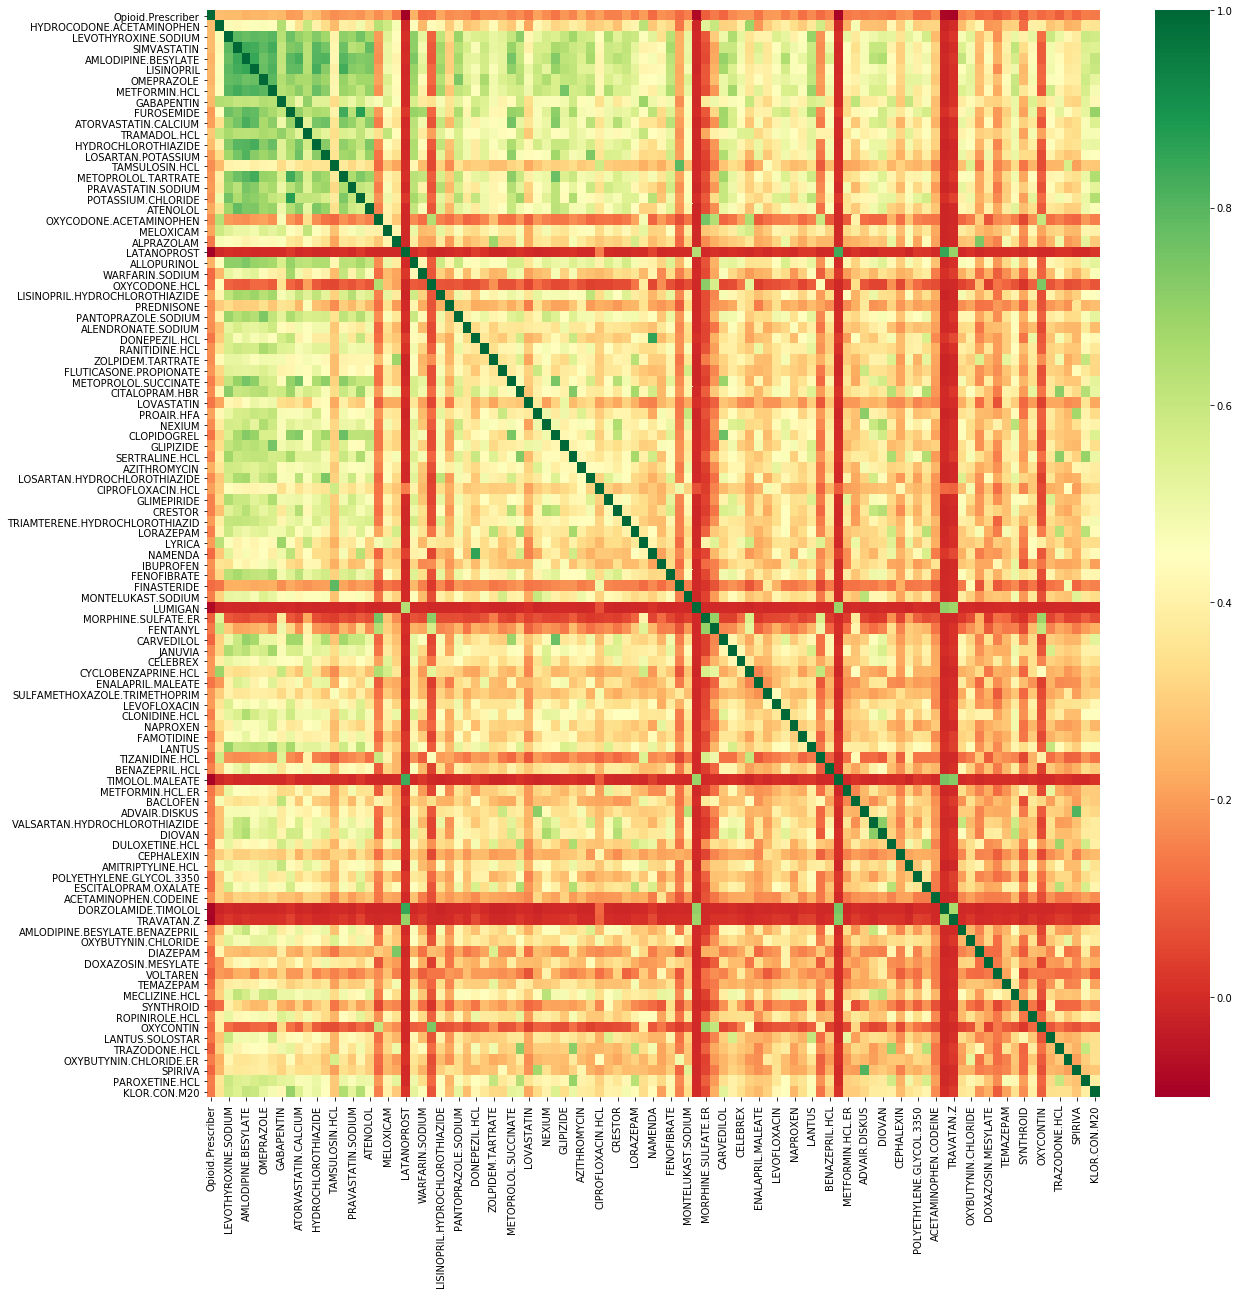

In [138]:
X = prescriber.iloc[:,0:101]  #independent columns
y = prescriber.iloc[:,0]    #target column i.e price range

import seaborn as sns

#get correlations of each features in dataset
corrmat = prescriber.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(prescriber[top_corr_features].corr(),annot=False,cmap="RdYlGn")

**We'll now select our features for modeling (X and y)**

In [139]:
y = prescriber['Opioid.Prescriber']
prescriber.drop(['Opioid.Prescriber'], axis = 1,inplace=True)
y[0:5]

0    1
1    1
2    0
3    1
4    1
Name: Opioid.Prescriber, dtype: int64

**Our features dataframe (prescriber) will be X**

In [140]:
X = prescriber
X[0:5]

,HYDROCODONE.ACETAMINOPHEN,LEVOTHYROXINE.SODIUM,SIMVASTATIN,AMLODIPINE.BESYLATE,LISINOPRIL,OMEPRAZOLE,METFORMIN.HCL,GABAPENTIN,FUROSEMIDE,ATORVASTATIN.CALCIUM,...,MECLIZINE.HCL,SYNTHROID,ROPINIROLE.HCL,OXYCONTIN,LANTUS.SOLOSTAR,TRAZODONE.HCL,OXYBUTYNIN.CHLORIDE.ER,SPIRIVA,PAROXETINE.HCL,KLOR.CON.M20
0,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,182,31,51,15,52,85,39,63,0,0,...,0,0,0,0,0,31,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,12,0,0,13,0
3,0,0,80,58,110,52,57,81,48,13,...,0,52,0,0,0,0,0,0,0,0
4,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Pre-Processing: Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [141]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[-0.17708927, -0.35643739, -0.37791132, -0.3841307 , -0.41125273,
        -0.37764182, -0.35797025, -0.36055055, -0.32332335, -0.36582801,
        -0.34558321, -0.38835311, -0.33480262, -0.23803644, -0.34818404,
        -0.30683758, -0.26765236, -0.33406065, -0.20920852, -0.26637176,
        -0.23261445, -0.11665836, -0.31724851, -0.2221058 , -0.14578114,
        -0.29697114, -0.27384331, -0.31983587, -0.24555256, -0.20413676,
        -0.26156782, -0.29587741, -0.32558958, -0.34342047, -0.30050678,
        -0.17496567, -0.33189424, -0.26588513, -0.30196137, -0.25035343,
        -0.31640716, -0.34689224, -0.23900496, -0.30283204, -0.22282904,
        -0.28017194, -0.26266359,  0.01106353, -0.25458   , -0.16711704,
        -0.25011692, -0.24306536, -0.16260601, -0.26567317, -0.07836316,
        -0.11070243, -0.16726092, -0.29116206, -0.24310501, -0.23640388,
        -0.23761104, -0.2040458 , -0.2753003 , -0.27487238, -0.24299566,
        -0.24228123, -0.18656142, -0.24619586, -0.1

# Classification 

Now, I will split the data into training and test sets and use the training set to build an accurate model. 
I will then use the test set to report the accuracy of the model.

In [142]:
# Split into validation and training data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state=1)

In [143]:
print ('Train set:', train_X.shape,  train_y.shape)
print ('Test set:', test_X.shape,  test_y.shape)

Train set: (17413, 100) (17413,)
Test set: (7463, 100) (7463,)


# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [144]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
print ('Libraries Loaded')

Libraries Loaded


In [145]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(train_X, train_y)
    yhat=neigh.predict(test_X)
    mean_acc[n-1] = metrics.accuracy_score(test_y, yhat)

    
    std_acc[n-1]=np.std(yhat==test_y)/np.sqrt(yhat.shape[0])

mean_acc

array([0.74125687, 0.81964357, 0.75398633, 0.83867078, 0.85193622,
       0.84537049, 0.85461611, 0.84858636, 0.85461611])

#### Finding the optimal 'k'...

In [146]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8546161061235428 with k= 7


#### Training...

In [147]:
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(train_X, train_y)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [148]:
yhat = neigh.predict(test_X)
yhat[0:5]

array([0, 0, 0, 0, 1])

In [149]:
knn_train_acc = metrics.accuracy_score(train_y, neigh.predict(train_X))
knn_test_acc = metrics.accuracy_score(test_y, yhat)

In [150]:
print("Train set Accuracy: ", knn_train_acc)
print("Test set Accuracy: ", knn_test_acc)

Train set Accuracy:  0.8822718658473554
Test set Accuracy:  0.8546161061235428


#### Evaluation

In [151]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

In [152]:
knn_f1 = f1_score(test_y, yhat, average='weighted') 
knn_f1

0.8557122315312591

In [153]:
knn_jac = jaccard_similarity_score(test_y, yhat)
knn_jac

0.8546161061235428

# Decision Tree

In [154]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [155]:
Tree.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [156]:
predTree = Tree.predict(test_X)

In [157]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(test_y, predTree))

DecisionTrees's Accuracy:  0.9129036580463621


#### Evaluation

In [158]:
tree_train_acc = metrics.accuracy_score(train_y, Tree.predict(train_X))
tree_test_acc = metrics.accuracy_score(test_y, predTree)
print ('train', tree_train_acc, 'test', tree_test_acc)

train 0.9123643255039339 test 0.9129036580463621


In [159]:
tree_f1 = f1_score(test_y, predTree, average='weighted') 
tree_f1

0.9135704411981359

In [160]:
tree_jac = jaccard_similarity_score(test_y, predTree)
tree_jac

0.9129036580463621

# Support Vector Machine

In [161]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(train_X, train_y) 

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [162]:
yyhat = clf.predict(test_X)
yyhat [0:5]

array([0, 0, 0, 0, 1])

#### Evaluation

In [163]:
svm_train_acc = metrics.accuracy_score(train_y, clf.predict(train_X))
svm_test_acc = metrics.accuracy_score(test_y, yyhat)
print ('train', svm_train_acc, 'test', svm_test_acc)

train 0.8575776718543617 test 0.8467104381615972


In [164]:
svm_f1 = f1_score(test_y, yyhat, average='weighted') 
svm_f1

0.8477531697387807

In [165]:
svm_jac = jaccard_similarity_score(test_y, yyhat)
svm_jac

0.8467104381615972

# Logistic Regression

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(train_X, train_y)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [167]:
yyyhat = LR.predict(test_X)
yyyhat[0:5]

array([0, 0, 0, 0, 1])

In [168]:
yhat_prob = LR.predict_proba(test_X)

#### Evaluation

In [169]:
lr_train_acc = metrics.accuracy_score(train_y, LR.predict(train_X))
lr_test_acc = metrics.accuracy_score(test_y, yyyhat)
print ('train', lr_train_acc, 'test', lr_test_acc)

train 0.8335151898007236 test 0.8335789896824334


In [170]:
lr_f1 = f1_score(test_y, yyyhat, average='weighted') 
lr_f1

0.8346258118115527

In [171]:
lr_jac = jaccard_similarity_score(test_y, yyyhat)
lr_jac

0.8335789896824334

In [172]:
from sklearn.metrics import log_loss
lr_ll = log_loss(test_y, yhat_prob)
lr_ll

0.4206440611949758

In [173]:
coeff_df = pd.DataFrame(prescriber.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(LR.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)[0:20]

,Feature,Correlation
0,LEVOTHYROXINE.SODIUM,2.316417
18,MELOXICAM,1.254205
10,HYDROCHLOROTHIAZIDE,1.138871
24,LISINOPRIL.HYDROCHLOROTHIAZIDE,0.792388
81,DORZOLAMIDE.TIMOLOL,0.742890
63,CLONIDINE.HCL,0.406435
1,SIMVASTATIN,0.338621
43,GLIMEPIRIDE,0.309371
6,GABAPENTIN,0.303488
26,PANTOPRAZOLE.SODIUM,0.282387


### 4. Naive Bayes

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions 
between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. 
Reference [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

In [174]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train_X, train_y)
yyyyhat = gaussian.predict(test_X)
acc_gaussian = round(gaussian.score(train_X, train_y) * 100, 2)
acc_gaussian

91.11

#### Evaluation

In [175]:
gaus_train_acc = metrics.accuracy_score(train_y, gaussian.predict(train_X))
gaus_test_acc = metrics.accuracy_score(test_y, yyyyhat)
print ('train', gaus_train_acc, 'test', gaus_test_acc)

train 0.9111009016252225 test 0.9104917593461075


In [176]:
gaus_f1 = f1_score(test_y, yyyyhat, average='weighted') 
gaus_f1

0.9110730285501175

In [177]:
gaus_jac = jaccard_similarity_score(test_y, yyyyhat)
gaus_jac

0.9104917593461075

### 7. Random Forests

The next model Random Forests is one of the most popular.
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, 
that operate by constructing a multitude of decision trees (n_estimators=100) at training time 
and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.

In [178]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_X, train_y)
randomyhat = random_forest.predict(test_X)
random_forest.score(train_X, train_y)
acc_random_forest = round(random_forest.score(train_X, train_y) * 100, 2)
acc_random_forest

97.93

#### Evaluation

In [179]:
random_train_acc = metrics.accuracy_score(train_y, random_forest.predict(train_X))
random_test_acc = metrics.accuracy_score(test_y, randomyhat)
print ('train', random_train_acc, 'test', random_test_acc)

train 0.9792683627175099 test 0.9236232078252713


In [180]:
random_f1 = f1_score(test_y, randomyhat, average='weighted') 
random_f1

0.9240123654563984

In [181]:
random_jac = jaccard_similarity_score(test_y, randomyhat)
random_jac

0.9236232078252713

### 8. Neural Network

Artificial neural networks (ANN) or connectionist systems are computing systems inspired by the biological neural networks that constitute animal brains.[1] The neural network itself is not an algorithm, but rather a framework for many different machine learning algorithms to work together and process complex data inputs.[2] 

Now it is time to train our model. SciKit Learn makes this incredibly easy, by using estimator objects. In this case we will import our estimator (the Multi-Layer Perceptron Classifier model) from the neural_network library of SciKit-Learn!

Next we create an instance of the model, there are a lot of parameters you can choose to define and customize here, we will only define the hidden_layer_sizes.
For this parameter you pass in a tuple consisting of the number of neurons you want at each layer, 
where the nth entry in the tuple represents the number of neurons in the nth layer of the MLP model. 

There are many ways to choose these numbers, but for simplicity we will choose 7 layers with 70 neurons along with 1000 max iterations.

In [182]:
from sklearn.neural_network import MLPClassifier

In [183]:
mlp = MLPClassifier(hidden_layer_sizes=(70,70,70,70,70,70,70),max_iter=1000)
mlp.fit(train_X, train_y)
NNyhat = mlp.predict(test_X)
mlp.score(train_X, train_y)
acc_mlp = round(mlp.score(train_X, train_y) * 100, 2)
acc_mlp

94.65

#### Evaluation

In [184]:
nn_train_acc = metrics.accuracy_score(train_y, mlp.predict(train_X))
nn_test_acc = metrics.accuracy_score(test_y, NNyhat)
print ('train', nn_train_acc, 'test', nn_test_acc)

train 0.9464767702291391 test 0.9051319844566528


In [185]:
NN_f1 = f1_score(test_y, NNyhat, average='weighted') 
NN_f1

0.9056783332969643

In [186]:
NN_jac = jaccard_similarity_score(test_y, NNyhat)
NN_jac

0.9051319844566528

# My Report
Report on the accuracy of the built models using different evaluation metrics are shown here:

In [187]:
report = {'Model': ['KNN', 'Tree', 'SVM', 'LR', 'Naive Bayes', 'Random Forest', 'NN'], 
          'Train Accuracy': [knn_train_acc, tree_train_acc, svm_train_acc, lr_train_acc, gaus_train_acc, random_train_acc, nn_train_acc],
          'Test Accuracy': [knn_test_acc, tree_test_acc, svm_test_acc, lr_test_acc, gaus_test_acc, random_test_acc, nn_test_acc],
        'Jaccard': [knn_jac.round(2), tree_jac.round(2), svm_jac.round(2), lr_jac.round(2), gaus_jac.round(2), random_jac.round(2), NN_jac.round(2)],
       'F1-score': [knn_f1.round(2), tree_f1.round(2), svm_f1.round(2), lr_f1.round(2), gaus_f1.round(2), random_f1.round(2), NN_f1.round(2)],
       'LogLoss': ['NA', 'NA', 'NA', lr_ll.round(2), 'NA', 'NA', 'NA']}
report_df = pd.DataFrame(report)
report_df

,Model,Train Accuracy,Test Accuracy,Jaccard,F1-score,LogLoss
0,KNN,0.882272,0.854616,0.85,0.86,NA
1,Tree,0.912364,0.912904,0.91,0.91,NA
2,SVM,0.857578,0.846710,0.85,0.85,NA
3,LR,0.833515,0.833579,0.83,0.83,0.42
4,Naive Bayes,0.911101,0.910492,0.91,0.91,NA
5,Random Forest,0.979268,0.923623,0.92,0.92,NA
6,NN,0.946477,0.905132,0.91,0.91,NA


## Tuning the algorithm (Random Forest)

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'bootstrap':[True], 'class_weight':[None], 'criterion':['gini'],
            'max_depth':[10], 'max_features':['auto'], 'max_leaf_nodes':[None],
            'min_impurity_decrease':[0.0], 'min_impurity_split':[None],
            'min_samples_leaf':[8], 'min_samples_split':[3],
            'min_weight_fraction_leaf':[0.0], 'n_estimators':[15, 25,35,45,55,100], 'n_jobs':[None],
            'oob_score':[False], 'random_state':[None], 'verbose':[0],
            'warm_start':[False]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(train_X, train_y)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(train_X, train_y)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [190]:
predictions = clf.predict(test_X)
print(accuracy_score(test_y, predictions))

0.9229532359640895


In [200]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, train_X, train_y, cv=10)
scores     

array([0.92135476, 0.91963261, 0.92020666, 0.92537313, 0.92078071,
       0.91963261, 0.92245836, 0.93275862, 0.92068966, 0.92298851])

In [229]:
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.9226 (+/- 0.0076)


In [202]:
random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
random_forest.fit(train_X, train_y)
random_ypredict = random_forest.predict(test_X)
random_acc = metrics.accuracy_score(test_y, random_ypredict)
print ('testing accuracy =', random_acc)

testing accuracy = 0.9229532359640895


In [208]:
predictions = clf.predict(test_X)
print(accuracy_score(test_y, predictions).round(4))

0.923
